In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import cycler

plt.rcParams.update({"text.usetex": True,'font.family': 'serif','font.size':14})

# Set color cycle
ncolor = 5
color_cycle = plt.cm.plasma(np.linspace(0, 1,ncolor))
plt.rcParams['axes.prop_cycle'] = cycler.cycler('color', color_cycle)

In [2]:
numsrc = np.array([1,10,100,1000,10000,100000,1000000])

# Instructions
Run the script `run_test.py` with appropriate arguments, to reproduce the plot in the paper, run
```
mkdir source_scaling_results
python run_test.py --gpu -R 10 -o source_scaling_results/r10.pkl
python run_test.py --gpu -R 30 -o source_scaling_results/r30.pkl
python run_test.py --gpu -R 50 -o source_scaling_results/r50.pkl
python run_test.py --gpu -R 100 -o source_scaling_results/r100.pkl
```
Noting that for $R=50$ and $R=100$, we edit the array `nsrc_range` in the script to go only up to $10^5$ and $10^4$ sources, respectively (since the timing converges and doing e.g. $10^6$ sources at $R=100$ would be quite costly)

In [3]:
with open("./source_scaling_results/r10.pkl","rb") as f:
    r10 = pkl.load(f)
with open("./source_scaling_results/r30.pkl","rb") as f:
    r30 = pkl.load(f)
with open("./source_scaling_results/r50.pkl","rb") as f:
    r50 = pkl.load(f)
with open("./source_scaling_results/r100.pkl","rb") as f:
    r100 = pkl.load(f)

In [4]:
t_r10 = r10['timings']
t_r30 = r30['timings']
t_r50 = r50['timings']
t_r100 = r100['timings']

Min time [s] = 3.1558841065316494e-09


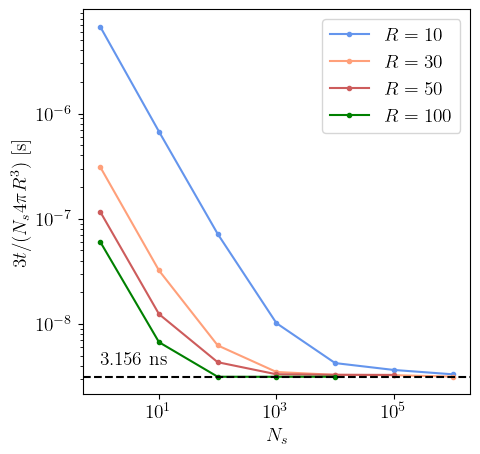

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
#ax.set_xlabel("Number of Sources")
#ax.set_ylabel("Computation Time per source pe cell [s]")
ax.set_xlabel("$N_s$")
#ax.set_ylabel("$t / (N_s \cdot V(R_{\gamma}))$ [s]")
ax.set_ylabel("$3t / (N_s 4\pi R^3)$ [s]")
#ax.set_ylabel("$t / (N_s R_{\gamma})$")
#ax.grid(':')
#ax.loglog(numsrc,numsrc*t_r10[0]/t_r10,'.-',label="$R=10$")
#ax.loglog(numsrc[:-1],t_r10[:-1] / 10**3,'-',label="$R=10$")
#ax.loglog(numsrc[:-1],t_r30[:-1] / 30**3,'-',label="$R=30$")
#ax.loglog(numsrc[:-1],t_r50  / 50**3,'-',label="$R=50$")
mintime = t_r30[-1] / numsrc[-1] / (4*np.pi*30**3/3)
print("Min time [s] =",mintime)

ax.loglog(numsrc,t_r10 / numsrc / (4*np.pi*10**3/3),'.-',label="$R=10$",color='cornflowerblue')
ax.loglog(numsrc,t_r30 / numsrc / (4*np.pi*30**3/3),'.-',label="$R=30$",color='lightsalmon')
ax.loglog(numsrc[:-1],t_r50  / numsrc[:-1] / (4*np.pi*50**3/3),'.-',label="$R=50$",color='indianred')
ax.loglog(numsrc[:-2],t_r100  / numsrc[:-2] / (4*np.pi*100**3/3),'.-',label="$R=100$",color='green')
ax.axhline(mintime,ls='--',color='black')
ax.annotate(f"{1e9*mintime : .3f} ns",xy=(1,1.3*mintime))
ax.legend() # <3

In [7]:
#fig.savefig("../source_scaling.eps",bbox_inches='tight')
fig.savefig("../scaling_sources.png",bbox_inches='tight',dpi=400)